In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import linregress

%matplotlib inline

### Sets color & design for plots

In [2]:
sns.set(style="whitegrid",context="poster",font_scale=.75,color_codes=True)
pretty = sns.color_palette("hls", 10)
sns.set_palette(pretty)

### Change in stress levels over time and between supported & survey groups

In [3]:
#array 1 is pre semester, array 2 is from post semester
stress = [[4, 1, 1, 4, 4, 1, 3, 3, 1, 5, 4, 5, 3, 4], [2, 1, 3, 3, 5, 1, 3, 3, 1, 5, 3, 4, 2, 3]]

#takes difference of pre/post reports for supported & surey groups
stress_end = [np.array(stress[1][0:5])-np.array(stress[0][0:5]),np.array(stress[1][6:13])-np.array(stress[0][6:13])]

#puts it into a dataframe
data_prepost = {"Pre-semester":stress[0],"Post-semester":stress[1]}
prepost_frame = pd.DataFrame(data=data_prepost)
print(prepost_frame)

    Post-semester  Pre-semester
0               2             4
1               1             1
2               3             1
3               3             4
4               5             4
5               1             1
6               3             3
7               3             3
8               1             1
9               5             5
10              3             4
11              4             5
12              2             3
13              3             4


/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


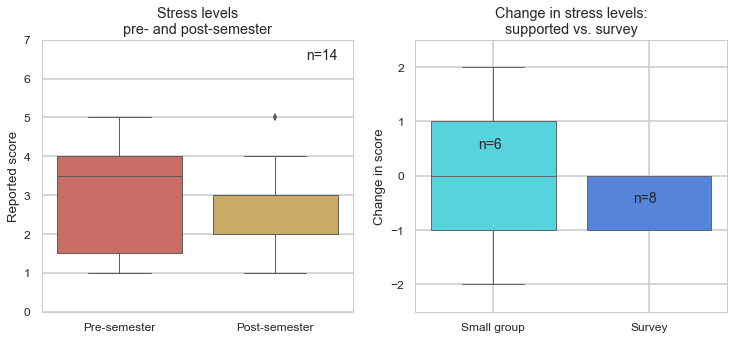

In [4]:
fig, ax= plt.subplots(nrows=1,ncols=2,figsize=(8,5))
fig.set_facecolor('white')
plt.subplots_adjust(left=.01,right=1.2)

sns.boxplot(prepost_frame[["Pre-semester","Post-semester"]],ax=ax[0],orient="v",linewidth=1)
ax[0].set_ylim(0,7)
ax[0].set_title("Stress levels\npre- and post-semester")
ax[0].set_ylabel("Reported score")
ax[0].text(1.2,6.5, "n=14",fontsize=14)
box = plt.boxplot(stress_end,0, 'o', bootstrap=5000, showmeans=False, widths = .8, labels=["Small group", "Survey"],patch_artist=True)

for patch, color in zip(box['boxes'], pretty[5:7]):
    patch.set_facecolor(color)
    patch.set_edgecolor((0.4,0.4,0.4))
for patch in box['medians']:
    patch.set_color((0.4,0.4,0.4))
for patch in box['whiskers']:
    patch.set_color((0.4,0.4,0.4))
    patch.set_linestyle('-')
for patch in box['caps']:
    patch.set_color((0.4,0.4,0.4))
plt.ylabel("Change in score")
plt.ylim(-2.5,2.5)
#plt.ylabel("Change in stress level \n(+ = more stress)")
plt.title("Change in stress levels:\nsupported vs. survey")
plt.text(.9,.5, "n=6",fontsize=14)
plt.text(1.9,-.5, "n=8",fontsize=14)

#fig.text(-.06,1,"[Fig. 1]",fontstyle="oblique",fontsize=12)


### Change in confidence levels over time and between supported & survey groups

In [74]:
#note to self: throw data onto github
confkno = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/confpriorkonwledge.csv"
#ckframe_nolow = pd.read_csv(confkno, encoding="utf-8-sig")
ckframe_all = pd.read_csv(confkno, encoding="utf-8-sig")

In [115]:
print(p)
print(ckframe_nolow)

                preconfidence  preprior  postprior  postsemester
postconfidence                                                  
7                           1         5          6      7.209974
4                           4         3          1      5.619423
5                           4         5          2      6.149606
5                           6         4          0      6.149606
3                           5         3          0      5.089239
3                           4         4          1      5.089239
4                           4         4          3      5.619423
3                           2         1          0      5.089239
4                           6         3          0      5.619423
6                           4         3          4      6.679790
   preconfidence  preprior  postconfidence  postprior  postsemester
0              1         5               7          6      7.134757
1              4         3               4          1      3.888449
2              4

In [118]:
pp = ckframe_nolow["postprior"]
pc = ckframe_nolow["postconfidence"]

postkc = np.polyfit(pp,pc, 1)
print(postkc)
post = np.poly1d(postkc)
print (post)
ckframe_nolow["postsemester"] = post(pp)

[ 0.53018373  3.49868766]
 
0.5302 x + 3.499


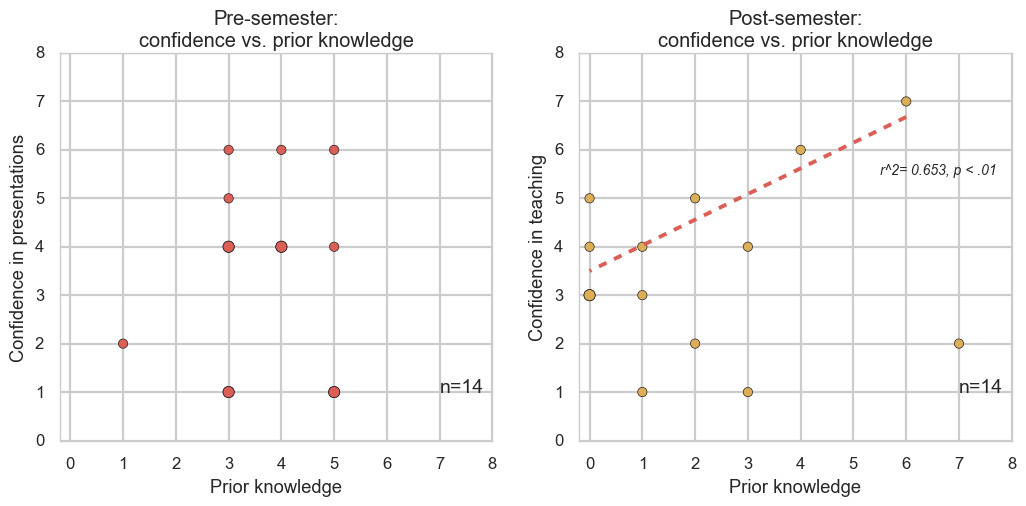

In [128]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
fig.set_facecolor('white')
plt.subplots_adjust(left=.01,right=1.2)

preg = ckframe_all.plot.scatter(x='preprior', y='preconfidence',title="Pre-semester:\nconfidence vs. prior knowledge", 
                           s=[65,65,65,45,45,65,45,65,65,65,45,45,45,65], c = pretty[0],ax=axes[0])
postg = ckframe_all.plot.scatter(x='postprior', y='postconfidence', title="Post-semester:\nconfidence vs. prior knowledge", s=[45,45,45,45,45,45,65,45,45,45,65,45,45,45], c=pretty[1],ax=axes[1])

p = ckframe_nolow.set_index('postprior')
p.postsemester.sort_index(ascending=False).plot(ax=postg,linestyle="--")

postg.invert_xaxis()
preg.set_ylim(0,8)
postg.set_ylim(0,8)
preg.set_xlim(-.2,8)
postg.set_xlim(-.2,8)

preg.set_xlabel("Prior knowledge")
preg.set_ylabel("Confidence in presentations")

postg.set_xlabel("Prior knowledge")
postg.set_ylabel("Confidence in teaching")

preg.text(7,1,"n=14",fontsize=14)
postg.text(7,1,"n=14",fontsize=14)
postg.text(5.5,5.5, "r^2= 0.653, p < .01",fontstyle="oblique")
#fig.text(-.06,1,"[Fig. 2]",fontstyle="oblique",fontsize=12)


In [98]:
slope, intercept, r_value, p_value, std_err = linregress(ckframe['preprior'],ckframe['preconfidence'])
print("Pre-semester: r^2=", round(r_value**2,4), "p=", round(p_value,4), "95% confidence limits: ", round(slope + 1.96*std_err,4),"<>", round(slope - 1.96*std_err,4))

slope, intercept, r_value, p_value, std_err = linregress(ckframe_nolow['postprior'],ckframe_nolow['postconfidence'])
print("Post-semester: r^2=", round(r_value**2,4), "p=", round(p_value, 4), slope + 1.96*std_err, slope - 1.96*std_err)
print(slope, intercept)



Pre-semester: r^2= 0.0073 p= 0.771 95% confidence limits:  1.1012 <> -0.8107
Post-semester: r^2= 0.653 p= 0.0047 0.797986914081 0.262380539987
0.530183727034 3.49868766404


### Impact of Faculty Support

In [26]:
fspath = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/facultysupport.csv"
fs_adjpath = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/facultysupport_nonull.csv"
fs = pd.read_csv(fspath)

### Linear regressions for stress, excitement, confidence, time spent and support

In [27]:
var = ['stressavg','excitementavg','confidence','time']

for i in var:
    z = np.polyfit(x=fs['support'],y=fs[i],deg=1)
    fit = np.poly1d(z)
    name = i + "support"
    fs[name] = fit(fs['support'])

In [47]:
print(fs[np.isfinite(fs[0:21])])

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Chi-squared values

In [711]:


slope, intercept, r_value, p_value, std_err = linregress(fs["stressavg"], fs["stressavgsupport"])
print("stress ", r_value**2, p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(fs["excitementavg"], fs["excitementavgsupport"])
print("excitement ", r_value**2, p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(fs["time"], fs["timesupport"])
print("time", r_value**2, p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(fs["confidence"], fs["confidencesupport"])
print("confidence ", r_value**2, p_value, slope + 1.96*std_err, slope - 1.96*std_err)

#chi_stress = chisquare(fs["stressavg"],fs["stressavgsupport"])
#chi_excite = chisquare(fs["excitementavg"],fs["excitementavgsupport"])
#chi_confidence = chisquare(fs["confidence"],fs["confidencesupport"])
#chi_time = chisquare(fs["time"],fs["timesupport"])

#for i in (chi_stress, chi_excite, chi_confidence, chi_time):
#    print (i)

stress  0.0201394712525 0.539462096587 0.0833057706972 -0.0430268281922
excitement  0.142028416861 0.0921780701964 0.298993605343 -0.0149367716205
time 0.0509236229094 0.325332653054 0.149776542256 -0.0479292964369
confidence  0.125130017302 0.115689683072 0.273905641528 -0.0236456069235


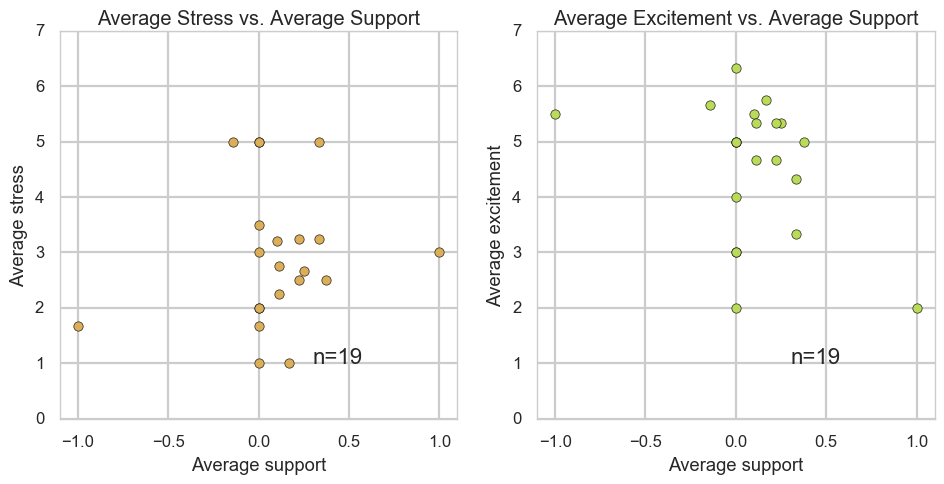

In [712]:
fig, axes = plt.subplots(nrows=1, ncols=2, squeeze=False, figsize=(10,5))
fig.set_facecolor('white')
plt.subplots_adjust(right=1);

ss = fs.plot.scatter(x='support', y='stressavg',title="Average Stress vs. Average Support", s=45, c = pretty[1],ax=axes[0,0])
es = fs.plot.scatter(x='support', y='excitementavg', title="Average Excitement vs. Average Support", s=45, c=pretty[2],ax=axes[0,1]);
#cs = fs.plot.scatter(x='support', y='confidence', title="Average Confidence vs. Average Support", s=45, c=pretty[3],ax=axes[1,0]);
#ts = fs.plot.scatter(x='support', y='time', title="Average Time vs. Average Support", s=45, c=pretty[4],ax=axes[1,1]);

#fs.set_index('support', inplace=True)
#fs.stressavgsupport.sort_index(ascending=False).plot(ax=ss,linestyle="--")
#fs.excitementavgsupport.sort_index(ascending=False).plot(ax=es,linestyle="--")
#fs.confidencesupport.sort_index(ascending=False).plot(ax=cs,linestyle="--")
#fs.timesupport.sort_index(ascending=False).plot(ax=ts,linestyle="--")

#axes[0,0].invert_xaxis()
#axes[0,1].invert_xaxis()
#axes[1,0].invert_xaxis()
#axes[1,1].invert_xaxis()
#es = fs.plot.scatter(x='support', y='excitementavg', title="Average Excitement vs. Average Support", s=45, c=pretty[2],ax=axes[0,1]);
#fs.set_index('support',inplace=True)
#fs.plot.scatter(x='time', y='support',title="Average time vs. average support", ax=axes[1,0]);
#fs.plot.scatter(x='confidence', y='support',title="Average confidence vs. average support",ax=axes[1,1]);

axes[0,0].set_ylim(0,7)
axes[0,1].set_ylim(0,7)
axes[0,0].set_xlim(-1.1,1.1)
axes[0,1].set_xlim(-1.1,1.1)
axes[0,0].text(.3, 1,"n=19",fontsize=16)
axes[0,1].text(.3, 1,"n=19",fontsize=16)
axes[0,0].set_xlabel("Average support")
axes[0,1].set_xlabel("Average support")
axes[0,0].set_ylabel("Average stress")
axes[0,1].set_ylabel("Average excitement")




### Over time

In [130]:
path = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/changeovertime.csv"
ts = pd.read_csv(path,skip_blank_lines=True)
print(ts)

    ﻿netid  stress1  stress2  stress3  stress4  stress5  stressavg  \
0     aii4      3.0      1.0      2.0      NaN      2.0   2.000000   
1   asp247      1.0      1.0      1.0      1.0      1.0   1.000000   
2    cje46      3.0      4.0      3.0      3.0      3.0   3.200000   
3   dag354      NaN      2.0      2.0      2.0      3.0   2.250000   
4    mr636      NaN      5.0      5.0      5.0      5.0   5.000000   
5    sz462      1.0      1.0      NaN      NaN      NaN   1.000000   
6     ums6      5.0      1.0      1.0      NaN      1.0   2.000000   
7    ak978      NaN      3.0      2.0      2.0      3.0   2.500000   
8    ath55      NaN      2.0      3.0      3.0      3.0   2.750000   
9    cje44      NaN      3.0      3.0      2.0      NaN   2.666667   
10   esk85      NaN      NaN      2.0      2.0      1.0   1.666667   
11    ii47      NaN      2.0      NaN      NaN      NaN   2.000000   
12  jls633      NaN      3.0      7.0      NaN      NaN   5.000000   
13   KL678      NaN 

/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



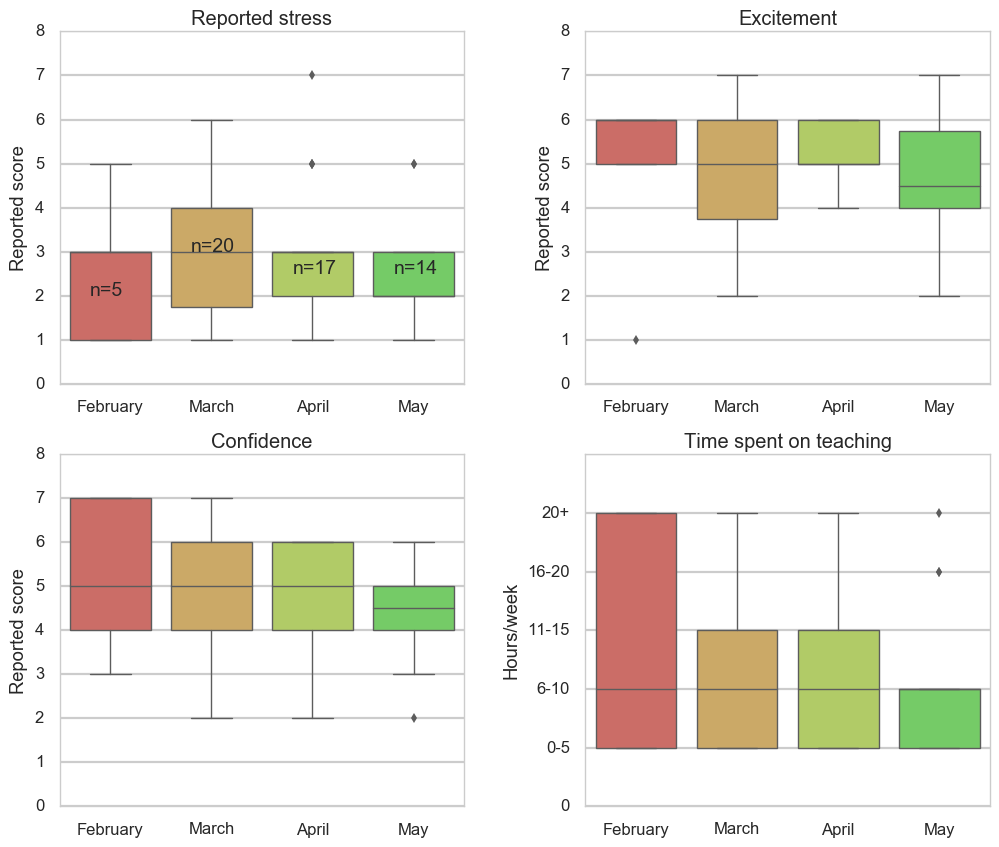

In [138]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,10))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.2,wspace=.3)

sns.boxplot(ts[['stress1','stress2','stress3','stress4']],linewidth=1,ax=ax[0,0])
ax[0,0].set_ylim(0,8)
ax[0,0].set_title("Reported stress")
ax[0,0].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[0,0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[0,0].set_xticklabels(labels)

sns.boxplot(ts[['confidence1','confidence2','confidence3','confidence4']],linewidth=1,ax=ax[1,0])
ax[1,0].set_ylim(0,8)
ax[1,0].set_title("Confidence")
ax[1,0].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[1,0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[1,0].set_xticklabels(labels)

sns.boxplot(ts[['excitement1','excitement2','excitement3','excitement4']],linewidth=1,ax=ax[0,1])
ax[0,1].set_title("Excitement")
ax[0,1].set_ylim(0,8)
ax[0,1].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[0,1].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[0,1].set_xticklabels(labels)

sns.boxplot(ts[['time1','time2','time3','time4']],linewidth=1,ax=ax[1,1])
ax[1,1].set_ylim(0,8)
ax[1,1].set_title("Time spent on teaching")
ax[1,1].set_ylabel("Hours/week")
labels = [item.get_text() for item in ax[1,1].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[1,1].set_xticklabels(labels)

labelsy = [item.get_text() for item in ax[1,1].get_yticklabels()]
labelsy = ["0","0-5","6-10","11-15","16-20","20+"]
ax[1,1].set_yticklabels(labelsy)
quest = ax[1,1].set_ylim(0,6)

ax[0,0].text(-.2,2,"n=5",fontsize=14)
ax[0,0].text(.8,3,"n=20",fontsize=14)
ax[0,0].text(1.8,2.5,"n=17",fontsize=14)
ax[0,0].text(2.8,2.5,"n=14",fontsize=14)

#fig.text(.07,.93,"[Fig. 3]",fontstyle="oblique")

/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



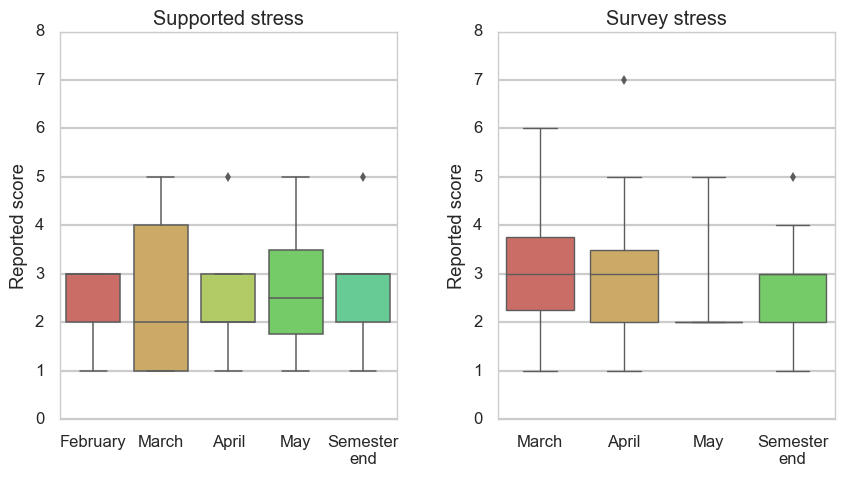

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.2,wspace=.3)

sns.boxplot(ts[['stress1','stress2','stress3','stress4','stress5']][0:5],linewidth=1.1,ax=ax[0])
ax[0].set_ylim(0,8)
ax[0].set_title("Supported stress")
ax[0].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
labels[4] = "Semester\nend"
ax[0].set_xticklabels(labels)

sns.boxplot(ts[['stress2','stress3','stress4','stress5']][6:22],linewidth=1,ax=ax[1])
ax[1].set_ylim(0,8)
ax[1].set_title("Survey stress")
ax[1].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[1].get_xticklabels()]
labels[0] = "March"
labels[1] = "April"
labels[2] = "May"
labels[3] = "Semester\nend"
ax[1].set_xticklabels(labels)

#fig.text(.07,.93,"[Fig. 3]",fontstyle="oblique")

/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



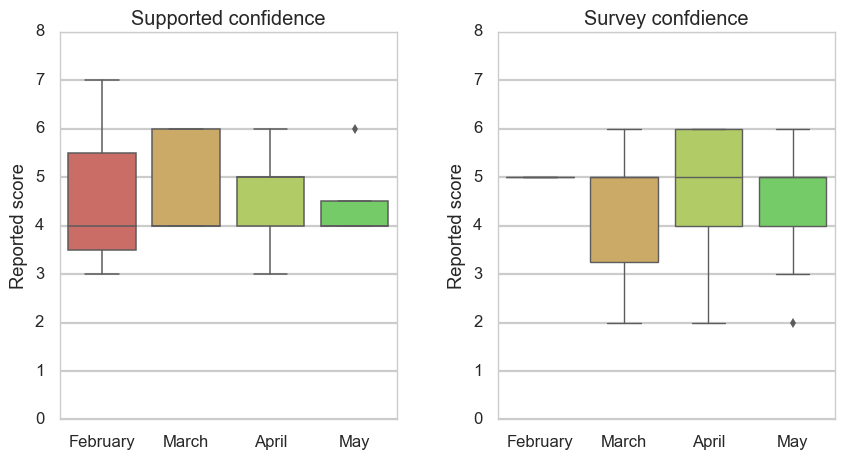

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.2,wspace=.3)

sns.boxplot(ts[['confidence1','confidence2','confidence3','confidence4']][0:5],linewidth=1.1,ax=ax[0])
ax[0].set_ylim(0,8)
ax[0].set_title("Supported confidence")
ax[0].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[0].set_xticklabels(labels)

sns.boxplot(ts[['confidence1','confidence2','confidence3','confidence4']][6:22],linewidth=1,ax=ax[1])
ax[1].set_ylim(0,8)
ax[1].set_title("Survey confdience")
ax[1].set_ylabel("Reported score")
ax[1].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



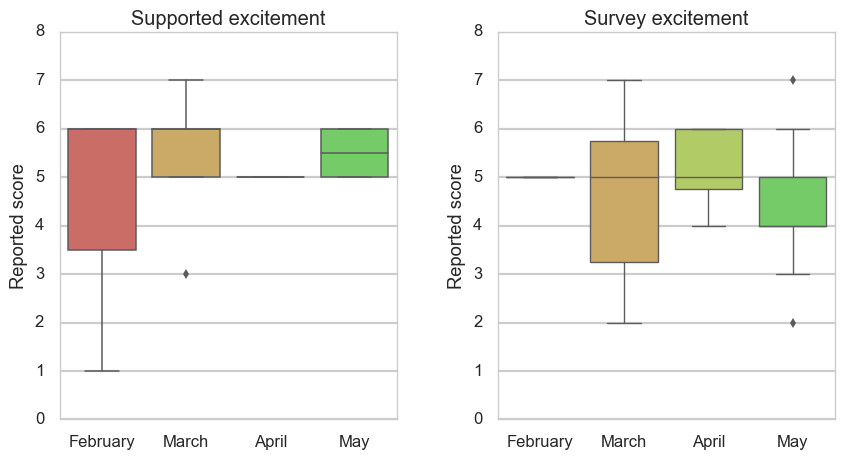

In [149]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.2,wspace=.3)

sns.boxplot(ts[['excitement1','excitement2','excitement3','excitement4']][0:5],linewidth=1.1,ax=ax[0])
ax[0].set_ylim(0,8)
ax[0].set_title("Supported excitement")
ax[0].set_ylabel("Reported score")
labels = [item.get_text() for item in ax[0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[0].set_xticklabels(labels)

sns.boxplot(ts[['excitement1','excitement2','excitement3','excitement4']][6:22],linewidth=1,ax=ax[1])
ax[1].set_ylim(0,8)
ax[1].set_title("Survey excitement")
ax[1].set_ylabel("Reported score")
ax[1].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

/Users/elizabeth/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning:

The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.



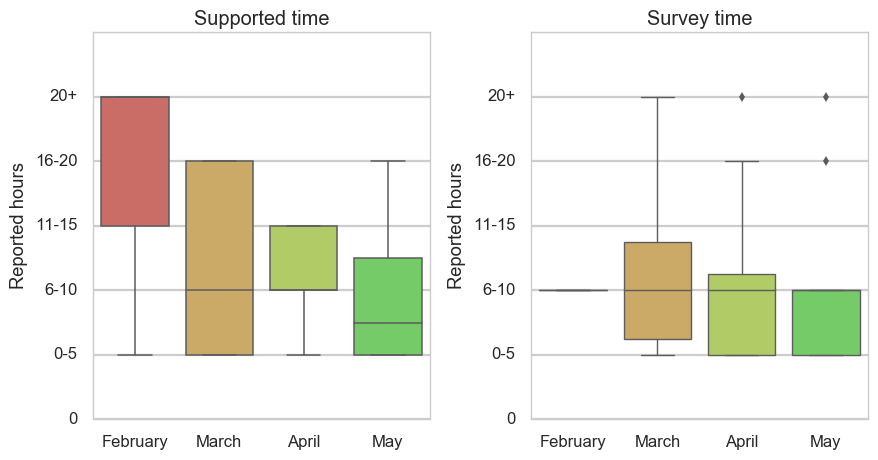

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.2,wspace=.3)

sns.boxplot(ts[['time1','time2','time3','time4']][0:5],linewidth=1.1,ax=ax[0])
ax[0].set_ylim(0,8)
ax[0].set_title("Supported time")
ax[0].set_ylabel("Reported hours")
labels = [item.get_text() for item in ax[0].get_xticklabels()]
labels[0] = "February"
labels[1] = "March"
labels[2] = "April"
labels[3] = "May"
ax[0].set_xticklabels(labels)

sns.boxplot(ts[['time1','time2','time3','time4']][6:22],linewidth=1,ax=ax[1])
ax[1].set_ylim(0,8)
ax[1].set_title("Survey time")
ax[1].set_ylabel("Reported hours")
ax[1].set_xticklabels(labels)
ax[1].set_xticklabels(labels)

labelsy = [item.get_text() for item in ax[1].get_yticklabels()]
labelsy = ["0","0-5","6-10","11-15","16-20","20+"]
ax[1].set_yticklabels(labelsy)
quest = ax[1].set_ylim(0,6)
ax[0].set_yticklabels(labelsy)
quest = ax[0].set_ylim(0,6)



### How interest & career affect excitement for & time spent on teaching

In [642]:
path = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/changeovertime.csv"
ts = pd.read_csv(path,skip_blank_lines=True)

In [643]:
int_frame = ts[np.isfinite(ts['interest'])]
int_frame.reset_index(inplace=True)

In [644]:
#path = "/Users/elizabeth/Dropbox/2017/Semester4/Teaching as Research/data/changeovertime.csv"
#ts = pd.read_csv(path,skip_blank_lines=True)

#int_frame = ts[np.isfinite(ts['interest'])]

i = int_frame['interest']
e = int_frame['excitementavg']
c = int_frame['career']
t = int_frame['timeavg']

#idx = np.isfinite(i) & np.isfinite(e)
ie = np.polyfit(i,e, 1)
iep = np.poly1d(ie)
int_frame["intexc"] = iep(i)

#idx = np.isfinite(c) & np.isfinite(e)
ce = np.polyfit(c,e, 1)
cep = np.poly1d(ce)
int_frame["carexc"] = cep(c)

#idx = np.isfinite(i) & np.isfinite(t)
it = np.polyfit(i,t, 1)
itp = np.poly1d(it)
int_frame["inttime"] = itp(i)

#idx = np.isfinite(c) & np.isfinite(t)
ct = np.polyfit(c,t, 1)
ctp = np.poly1d(ct)
int_frame["cartime"] = ctp(c)

/Users/elizabeth/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/elizabeth/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/elizabeth/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [645]:
slope, intercept, r_value, p_value, std_err = linregress(i, e)
print("interest-excitement: r^2=", r_value**2, "p=", p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(i, t)
print("interest-time: r^2=", r_value**2, "p=", p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(c, e)
print("career-excitement: r^2=", r_value**2,"p=", p_value, slope + 1.96*std_err, slope - 1.96*std_err)
slope, intercept, r_value, p_value, std_err = linregress(c, t)
print("career-time: r^2=", r_value**2,"p=", p_value, slope + 1.96*std_err, slope - 1.96*std_err)

interest-excitement: r^2= 0.204145005751 p= 0.0521336664066 0.774152156828 0.0245204095204
interest-time: r^2= 0.168378509001 p= 0.0809840278366 0.714552504867 -0.0196164182766
career-excitement: r^2= 0.323643669911 p= 0.0110243878379 0.629843859923 0.116768606176
career-time: r^2= 0.0628317340331 p= 0.300631488742 0.446905258883 -0.131729107157


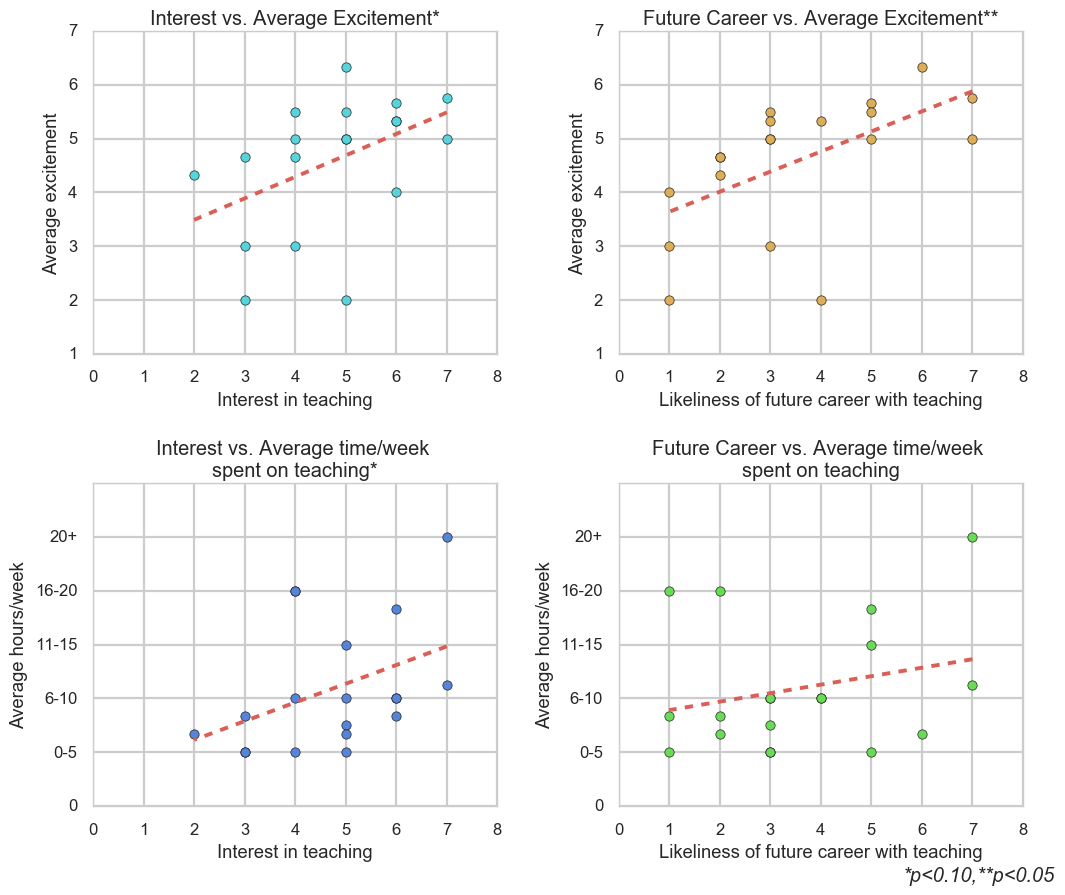

In [817]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(12,10))#,sharex=True,sharey=True)
fig.set_facecolor('white')
plt.subplots_adjust(hspace=.4,wspace=.3)

plotie = int_frame.plot.scatter(x='interest',y='excitementavg', title="Interest vs. Average Excitement*", s=45, c=pretty[5],ax=ax[0,0])
plotce = int_frame.plot.scatter(x='career',y='excitementavg', title="Future Career vs. Average Excitement**", s=45, c=pretty[1], ax=ax[0,1])
plotit = int_frame.plot.scatter(x='interest',y='timeavg', title="Interest vs. Average time/week \nspent on teaching*",s=45, c=pretty[6], ax=ax[1,0])
plotct = int_frame.plot.scatter(x='career',y='timeavg', title="Future Career vs. Average time/week \nspent on teaching", s=45, c=pretty[3],ax=ax[1,1])

n = int_frame.set_index('interest')
n.intexc.sort_index(ascending=False).plot(ax=plotie,linestyle="--")
n.inttime.sort_index(ascending=False).plot(ax=plotit,linestyle="--")

m = int_frame.set_index('career')
m.carexc.sort_index(ascending=False).plot(ax=plotce,linestyle="--")
m.cartime.sort_index(ascending=False).plot(ax=plotct,linestyle="--")

ax[0,0].invert_xaxis()
ax[1,0].invert_xaxis()
ax[0,1].invert_xaxis()
ax[1,1].invert_xaxis()

ax[0,0].set_xlim(0,8)
ax[1,0].set_xlim(0,8)
ax[0,1].set_xlim(0,8)
ax[1,1].set_xlim(0,8)

labelsy = [item.get_text() for item in ax[1,1].get_yticklabels()]
labelsy = ["0","0-5","6-10","11-15","16-20","20+"]
ax[1,1].set_yticklabels(labelsy)
ax[1,1].set_ylim(0,6)
ax[1,0].set_yticklabels(labelsy)
ax[1,0].set_ylim(0,6)

ax[0,0].set_ylabel("Average excitement")
ax[1,0].set_ylabel("Average hours/week")
ax[0,1].set_ylabel("Average excitement")
ax[1,1].set_ylabel("Average hours/week")

ax[0,0].set_xlabel("Interest in teaching")
ax[1,0].set_xlabel("Interest in teaching")
ax[0,1].set_xlabel("Likeliness of future career with teaching")
ax[1,1].set_xlabel("Likeliness of future career with teaching")

#fig.text(.07,.93,"[Fig. 4]",fontstyle="oblique")
fig.text(.8,.05,"*p<0.10,**p<0.05",fontstyle="oblique")
